Testing data number: 9721
8748
973
Epoch 1/20
26244/26244 [==============================] - 1164s - loss: 0.0328 - val_loss: 0.0132
Epoch 2/20
26244/26244 [==============================] - 1156s - loss: 0.0125 - val_loss: 0.0097
Epoch 3/20
26244/26244 [==============================] - 1151s - loss: 0.0102 - val_loss: 0.0083
Epoch 4/20
26244/26244 [==============================] - 1187s - loss: 0.0094 - val_loss: 0.0081
Epoch 5/20
26244/26244 [==============================] - 1133s - loss: 0.0089 - val_loss: 0.0078
Epoch 6/20
26244/26244 [==============================] - 1131s - loss: 0.0085 - val_loss: 0.0078
Epoch 7/20
26244/26244 [==============================] - 1130s - loss: 0.0082 - val_loss: 0.0075
Epoch 8/20
26244/26244 [==============================] - 1134s - loss: 0.0082 - val_loss: 0.0076
Epoch 9/20
26244/26244 [==============================] - 1124s - loss: 0.0078 - val_loss: 0.0072
Epoch 10/20
26244/26244 [==============================] - 1126s - loss: 0.0076 - v

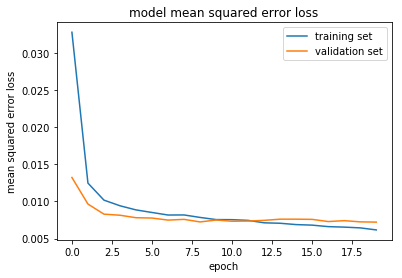

In [5]:
import csv
import cv2
import random
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Convolution2D, MaxPooling2D, Dropout, Cropping2D, Activation
from keras.optimizers import Adam
from keras.layers.advanced_activations import ELU
from sklearn.model_selection import train_test_split

def flip(image, angle):
    img = cv2.flip(image,1)
    ang = angle*(-1)
    return img, ang


def generator1(path, angles, batchSize = 32):
    x = np.zeros((batchSize,160,320,3), dtype=np.uint8)
    y = np.zeros(batchSize)
    while True:
        data, angle = shuffle(path, angles)
        for i in range(batchSize):
            choice = int(np.random.choice(len(data), 1))
            x[i] = cv2.imread(data[choice])
            y[i] = angle[choice]
            # Flip random images
            flip_coin = random.randint(0,1)
            if flip_coin == 1:
                x[i], y[i] = flip(x[i], y[i])
        yield x, y

def generate_samples(paths):
    samples = []
    for path in paths:
        csv_path = path + 'driving_log.csv'
        with open(csv_path) as csvfile:
            reader = csv.reader(csvfile)
            for line in reader:
                samples.append(line)

    print("Testing data number:", len(samples))

    return samples
def generator(samples, split_str="", flip=False,batch_size_=64, use_side_cameras=True, correction=0.2):
    num_samples = len(samples)
    while 1:  # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size_):
            batch_samples = samples[offset:offset + batch_size_]

            images = []
            angles = []
            for batch_sample in batch_samples:
                if use_side_cameras:
                    for i in range(0,3):
                        source_path = batch_sample[i]
#                         print(source_path)
                        current_path = 'Simulation_data/data/IMG/' + (source_path.split('/')[-1]).split('\\')[-1]
                        current_path = (source_path.replace('\\','/')).split('master')[-1]
                        current_path = current_path[1:]
#                         print(current_path)

                        image = cv2.imread(current_path)
                        if i == 0:
                            angle = float(batch_sample[3])
                        elif i == 1:
                            angle = float(batch_sample[3]) + correction
                        elif i == 2:
                            angle = float(batch_sample[3]) - correction

                        images.append(image)
                        angles.append(angle)
                else:
                    source_path = batch_sample[0]
                    current_path = '..' + source_path.split(split_str)[-1].replace('\\','/')
                    image = cv2.imread(current_path)
                    angle = float(batch_sample[3])
                    images.append(image)
                    angles.append(angle)

#             print(image.shape)
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)


# def LeNet():
#     LeNet = Sequential()
#     # LeNet.add(Cropping2D(cropping=((40,20),(0,0)), input_shape=(160,320,3)))
#     LeNet.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(64,64,3)))

#     LeNet.add(Convolution2D(6, 5, 5, subsample=(1, 1), border_mode='valid', activation='elu'))
#     LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='valid'))

#     LeNet.add(Convolution2D(16, 5, 5, subsample=(1, 1), border_mode="valid", activation='elu'))
#     LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='valid'))

#     LeNet.add(Flatten())

#     LeNet.add(Dropout(0.5))
#     LeNet.add(Dense(120, activation='elu'))

#     LeNet.add(Dropout(0.5))
#     LeNet.add(Dense(84, activation='elu'))

#     LeNet.add(Dense(10, activation='elu'))

#     LeNet.add(Dense(1))
#     return LeNet



# def Nvidia(input_shape=(160, 320, 3)):
#     model = Sequential()

# #     model.add(Cropping2D(cropping=((40,20),(0,0)), input_shape=(160,320,3)))

#     model.add(Lambda(lambda x: x / 255.0 - 0.5, name="image_normalization", input_shape=(160,320,3)))

#     model.add(Convolution2D(24, 5, 5, name="convolution_1", subsample=(2, 2), border_mode="valid", init='he_normal'))
#     model.add(ELU())
#     model.add(Convolution2D(36, 5, 5, name="convolution_2", subsample=(2, 2), border_mode="valid", init='he_normal'))
#     model.add(ELU())
#     model.add(Convolution2D(48, 5, 5, name="convolution_3", subsample=(2, 2), border_mode="valid", init='he_normal'))
#     model.add(ELU())
#     model.add(Convolution2D(64, 3, 3, name="convolution_4", border_mode="valid", init='he_normal'))
#     model.add(ELU())

#     model.add(Flatten())

#     model.add(Dropout(0.5))

#     model.add(Dense(100, name="hidden1", init='he_normal'))
#     model.add(RELU())

#     model.add(Dropout(0.5))

#     model.add(Dense(50, name="hidden2", init='he_normal'))
#     model.add(RELU())
#     model.add(Dense(10, name="hidden3", init='he_normal'))
#     model.add(RELU())

#     model.add(Dense(1, name="steering_angle", activation="linear"))

#     return model
def Nvidia_model():
   
    # Normalizing, Mean Cenetring, Cropping
    model = Sequential()
    # model.add(Cropping2D(cropping=((40,20),(0,0)), input_shape=(160,320,3)))

    model.add(Lambda(lambda x: x / 255.0 - 0.5, name="image_normalization", input_shape=(160,320,3)))
   
   # Nvidia Architecture
    model.add(Convolution2D(nb_filter=24,nb_row=5,nb_col=5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(nb_filter=36,nb_row=5,nb_col=5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(nb_filter=48,nb_row=5,nb_col=5,subsample=(2,2),activation='relu'))
    model.add(Convolution2D(nb_filter=64,nb_row=3,nb_col=3,activation='relu'))
    model.add(Convolution2D(nb_filter=64,nb_row=3,nb_col=3,activation='relu'))
    model.add(Flatten())

   # Adding Dropout layer
    model.add(Dropout(p=0.2))
    model.add(Activation('relu'))
    model.add(Dense(1000))

   # Adding Dropout layer
    model.add(Dropout(p=0.5))
    model.add(Activation('relu'))
    model.add(Dense(500))

   # Adding Dropout layer
    model.add(Dropout(p=0.5))
    model.add(Activation('relu'))
    model.add(Dense(100))

   # Adding Dropout layer
    model.add(Dropout(p=0.2))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Dense(1)) # Steering angle action

    return model



epochs = 20
batch_size = 128

model = Nvidia_model()

paths = ['Simulation_data/data/','Simulation_data/self_recorded/']

# paths = ['Simulation_data/self_recorded/']
# paths = ['Simulation_data/data/']
samples = generate_samples(paths)
train_samples, validation_samples = train_test_split(samples, test_size=0.1)

print(len(train_samples))
# test = np.array(train_samples)
# print(test.shape)
print(len(validation_samples))


train_generator = generator(train_samples, batch_size_=batch_size)
validation_generator = generator(validation_samples, batch_size_=batch_size)

model.compile(loss='mse', optimizer='adam')

history_object = model.fit_generator(train_generator,
                                     samples_per_epoch=len(train_samples)* 3,
                                     validation_data=validation_generator,
                                     nb_val_samples= len(validation_samples)*3,
                                     nb_epoch=epochs)



model.summary()
# plot the training and validation loss for each epoch
from matplotlib import pyplot as plt

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()
    

model.save('Nvidia_'+str(epochs)+'e_'+str(batch_size)+'.h5')